In [1]:
import pandas as pd

file_path = '../../data/clean_data/merged_data.csv'
merged_data = pd.read_csv(file_path)

merged_data.head()


,Entity,Year,Annual CO₂ emissions,Primary energy consumption (TWh),GDP,Population,Log Annual CO₂ emissions,Log Primary energy consumption (TWh),Log GDP,Log Population
0,Afghanistan,2000,1047127.94,5.913606,3.521418e+09,19542982.0,13.861563,1.933491,21.982130,16.788127
1,Afghanistan,2001,1069098.00,4.664077,2.813572e+09,19688632.0,13.882327,1.734144,21.757721,16.795552
2,Afghanistan,2002,1340995.00,4.428160,3.825701e+09,21000256.0,14.108923,1.691600,22.065008,16.860045
3,Afghanistan,2003,1559602.00,5.207662,4.520947e+09,22645130.0,14.259942,1.825784,22.231987,16.935455
4,Afghanistan,2004,1237247.00,4.810372,5.224897e+09,23553551.0,14.028400,1.759645,22.376701,16.974787


## Linear Regression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

X = merged_data[['Log Population', 'Log GDP', 'Log Primary energy consumption (TWh)']]
y = merged_data['Log Annual CO₂ emissions']

# missing values
X = X.fillna(0)
y = y.fillna(0)

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize
X_train_normalized = (X_train - X_train.mean()) / X_train.std()
X_test_normalized = (X_test - X_train.mean()) / X_train.std()

# model fitting
linear_reg = LinearRegression()
linear_reg.fit(X_train_normalized, y_train)

y_pred = linear_reg.predict(X_test_normalized)

# evaluate
r2_LR = r2_score(y_test, y_pred)
r2_LR


0.9614430444830648

## Feature Importance Analysis Using Random Forest

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X = merged_data[['Log Population', 'Log GDP', 'Log Primary energy consumption (TWh)']]
y = merged_data['Log Annual CO₂ emissions']

X = X.fillna(0)
y = y.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_normalized = (X_train - X_train.mean()) / X_train.std()
X_test_normalized = (X_test - X_train.mean()) / X_train.std()

# train the Rf
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train_normalized, y_train)

y_pred_rf = rf_regressor.predict(X_test_normalized)

# Evaluate 
r2_rf = r2_score(y_test, y_pred_rf)

# feature importances
feature_importances = rf_regressor.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

r2_rf, importance_df


(0.9876640491868398,
                                 Feature  Importance
 2  Log Primary energy consumption (TWh)    0.977496
 0                        Log Population    0.013903
 1                               Log GDP    0.008601)

## prediction with Random Forest

In [4]:
y_pred_rf = rf_regressor.predict(X_test_normalized)

# display predictions alongside actual values
predictions_df = pd.DataFrame({
    'Actual CO2 Emissions': y_test.values,
    'Predicted CO2 Emissions': y_pred_rf
}).reset_index(drop=True)

predictions_df.head()


,Actual CO2 Emissions,Predicted CO2 Emissions
0,19.057854,19.149818
1,16.509623,16.431608
2,18.048598,18.130932
3,17.951898,17.823225
4,19.333655,19.415114


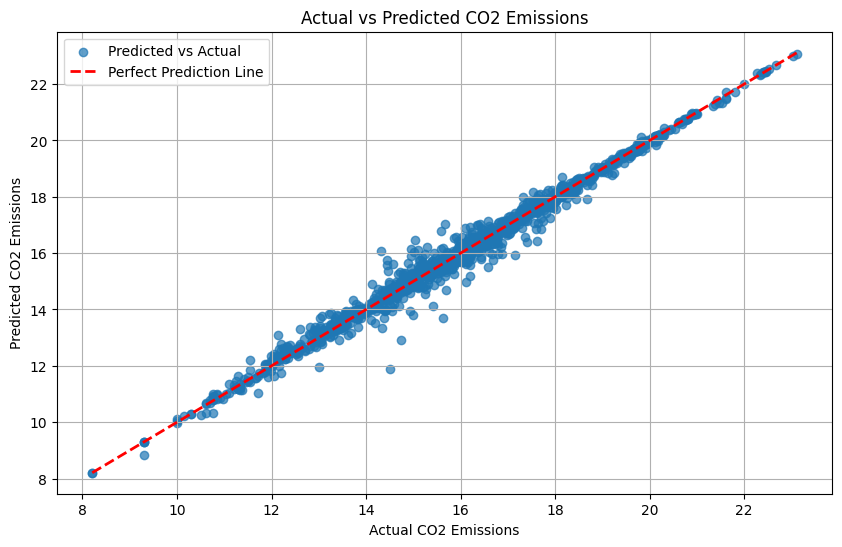

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')
plt.title('Actual vs Predicted CO2 Emissions')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.legend(loc='best') 
plt.grid()
plt.savefig(f"../../img/RF_Prediction.png")
plt.show()



In [6]:
new_data = pd.DataFrame({
    'Log Population': [16.5, 17.0],  # Example values
    'Log GDP': [22.5, 23.0],
    'Log Primary energy consumption (TWh)': [2.0, 2.5]
})

new_data_normalized = (new_data - X_train.mean()) / X_train.std()

# Predict CO2 emissions for new data
new_predictions = rf_regressor.predict(new_data_normalized)

new_predictions


array([14.08175671, 14.5106103 ])

## Support Vector Machine (SVM) Classification

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Create labels for high/low emissions based on the median value
threshold = y.median()
y_classification = (y > threshold).astype(int)  # 1 for high emissions, 0 for low emissions

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_classification, test_size=0.2, random_state=42
)

# Step 3: Normalize the data
X_train_normalized = (X_train - X_train.mean()) / X_train.std()
X_test_normalized = (X_test - X_train.mean()) / X_train.std()

# Step 4: Train the SVM model
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_normalized, y_train)

# Step 5: Make predictions
y_pred = svm_classifier.predict(X_test_normalized)

# Step 6: Evaluate the model
accuracy_SVM = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy_SVM, precision, recall, f1


(0.9475890985324947,
 np.float64(0.95),
 np.float64(0.946058091286307),
 np.float64(0.9480249480249481))

## PCA +Regression

In [8]:
#pip install numpy pandas scikit-learn


In [9]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# R-Squared
r2_PCA = r2_score(y_test, y_pred)
print(f"R-Squared (R2): {r2_PCA}")
# Define features and target
features = ["Log Primary energy consumption (TWh)", "Log GDP", "Log Population"]
target = "Log Annual CO₂ emissions"


X = merged_data[features]
y = merged_data[target]

# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply PCA
n_components = 2  # Number of principal components to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")
print(f"Total explained variance: {np.sum(explained_variance)}")


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

R-Squared (R2): 0.7903333567761446
Explained variance by each component: [0.86929261 0.10537703]
Total explained variance: 0.9746696312977078
Root Mean Squared Error (RMSE): 0.61770640758928


## KNN

Root Mean Squared Error (RMSE): 0.2738782817334978
R-Squared (R2): 0.9882594003194984


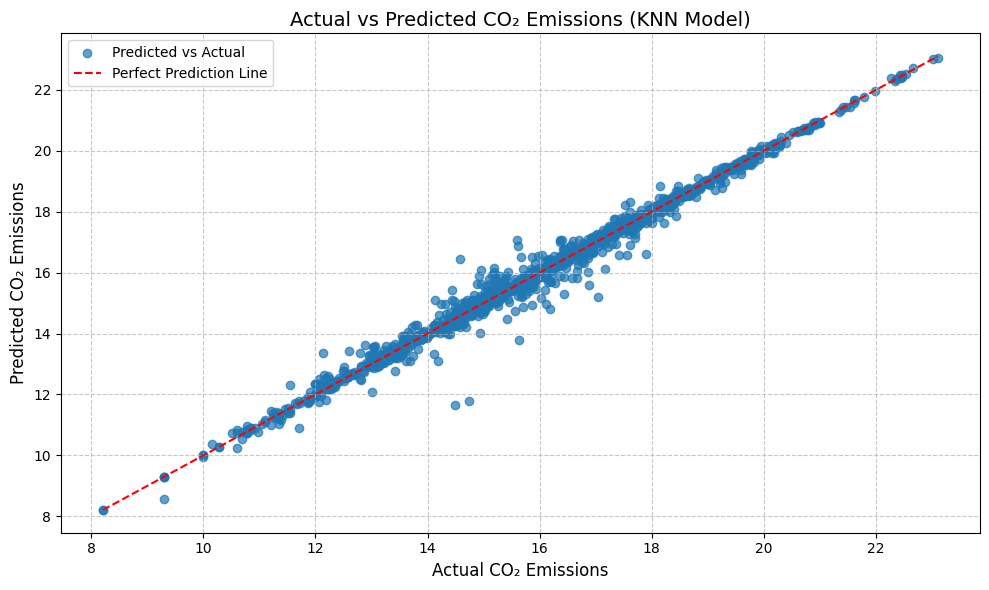

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

# Define features and target
features = ["Log Primary energy consumption (TWh)", "Log GDP", "Log Population"]
target = "Log Annual CO₂ emissions"

# Split the data into features (X) and target (y)
X = merged_data[features]
y = merged_data[target]

# train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize and train the KNN model
k = 3  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_KNN = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2_KNN}")

# validation plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Actual vs Predicted CO₂ Emissions (KNN Model)', fontsize=14)
plt.xlabel('Actual CO₂ Emissions', fontsize=12)
plt.ylabel('Predicted CO₂ Emissions', fontsize=12)
plt.legend()
plt.grid(alpha=0.7, linestyle='--')
plt.tight_layout()
plt.savefig(f"../../img/KNN_Prediction.png")
plt.show()


## Neural Network

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target
features = ["Log Primary energy consumption (TWh)", "Log GDP", "Log Population"]
target = "Log Annual CO₂ emissions"

# Split the data into features (X) and target (y)
X = merged_data[features]
y = merged_data[target]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the Neural Network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer with 64 neurons
    Dense(32, activation='relu'),  # Second hidden layer with 32 neurons
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_NN = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2_NN}")


Epoch 1/50


/opt/anaconda3/envs/transformers/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 198.8135 - mse: 198.8135 - val_loss: 26.2604 - val_mse: 26.2604
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 18.7259 - mse: 18.7259 - val_loss: 3.1643 - val_mse: 3.1643
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 2.1419 - mse: 2.1419 - val_loss: 0.7108 - val_mse: 0.7108
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.5888 - mse: 0.5888 - val_loss: 0.4240 - val_mse: 0.4240
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 0.3995 - mse: 0.3995 - val_loss: 0.3535 - val_mse: 0.3535
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 0.3325 - mse: 0.3325 - val_loss: 0.3064 - val_mse: 0.3064
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.2947 - mse: 0.2947 - val_loss: 0.2759 - val_mse: 0.2759
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 0.2666 - mse: 0.2666 - val_loss: 0.2511 - val_mse: 0.2511
Epoch 9/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 60

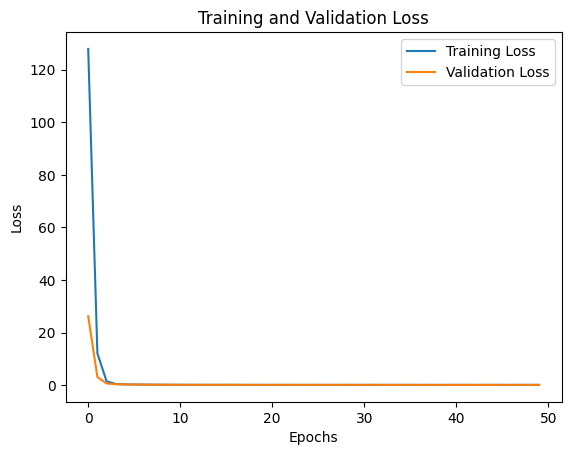

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## time series

In [13]:
# pip install statsmodels prophet pmdarima


In [ ]:
import pandas as pd

# aggregate data by year for CO2 emissions
time_series_data = merged_data.groupby("Year")["Log Annual CO₂ emissions"].sum()

# Reset indexes to prepare the data
time_series_data = time_series_data.reset_index()
time_series_data.columns = ['Year', 'CO2_Emissions']
time_series_data['Year'] = pd.to_datetime(time_series_data['Year'], format='%Y')

# Display the data
print(time_series_data.head())


        Year  CO2_Emissions
0 1965-01-01     755.113135
1 1966-01-01     756.962723
2 1967-01-01     779.339831
3 1968-01-01     801.428957
4 1969-01-01     804.914442


ARIMA RMSE: 146.2492067123549


/opt/anaconda3/envs/transformers/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


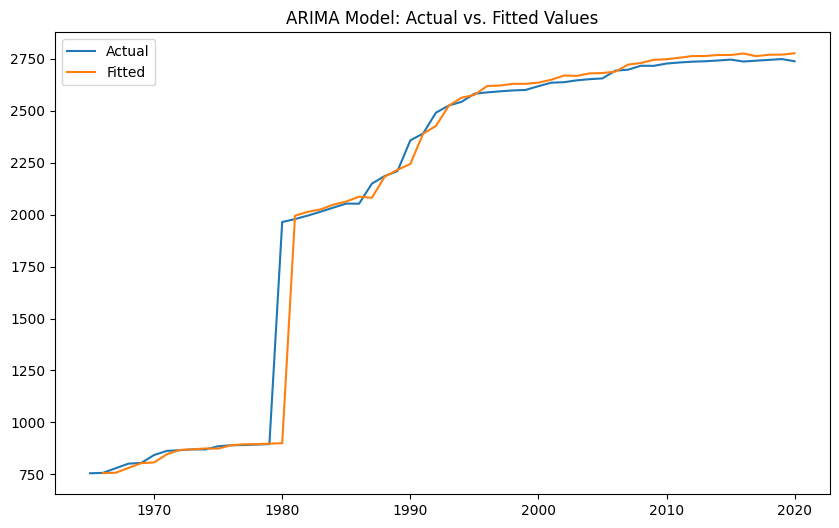

In [15]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Fit ARIMA model (order=(p, d, q) - tune these values based on your data)
arima_model = ARIMA(time_series_data['CO2_Emissions'], order=(2, 1, 2))  # Example: (p=2, d=1, q=2)
arima_result = arima_model.fit()

# Forecast future values (e.g., next 10 years)
forecast = arima_result.forecast(steps=10)

# Evaluate the model
fitted_values = arima_result.fittedvalues
mse = mean_squared_error(time_series_data['CO2_Emissions'][1:], fitted_values[1:])
rmse = np.sqrt(mse)
print(f"ARIMA RMSE: {rmse}")

# Plot actual vs. fitted values
plt.figure(figsize=(10, 6))
plt.plot(time_series_data['Year'], time_series_data['CO2_Emissions'], label='Actual')
plt.plot(time_series_data['Year'][1:], fitted_values[1:], label='Fitted')
plt.legend()
plt.title('ARIMA Model: Actual vs. Fitted Values')
plt.savefig(f"../../img/ARIMA.png")
plt.show()


/var/folders/yn/q77cltd96m39dvp38lfzz1240000gn/T/ipykernel_29084/2585474044.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=time_series_data['Year'].iloc[-1] + pd.offsets.YearEnd(1), periods=10, freq='Y')


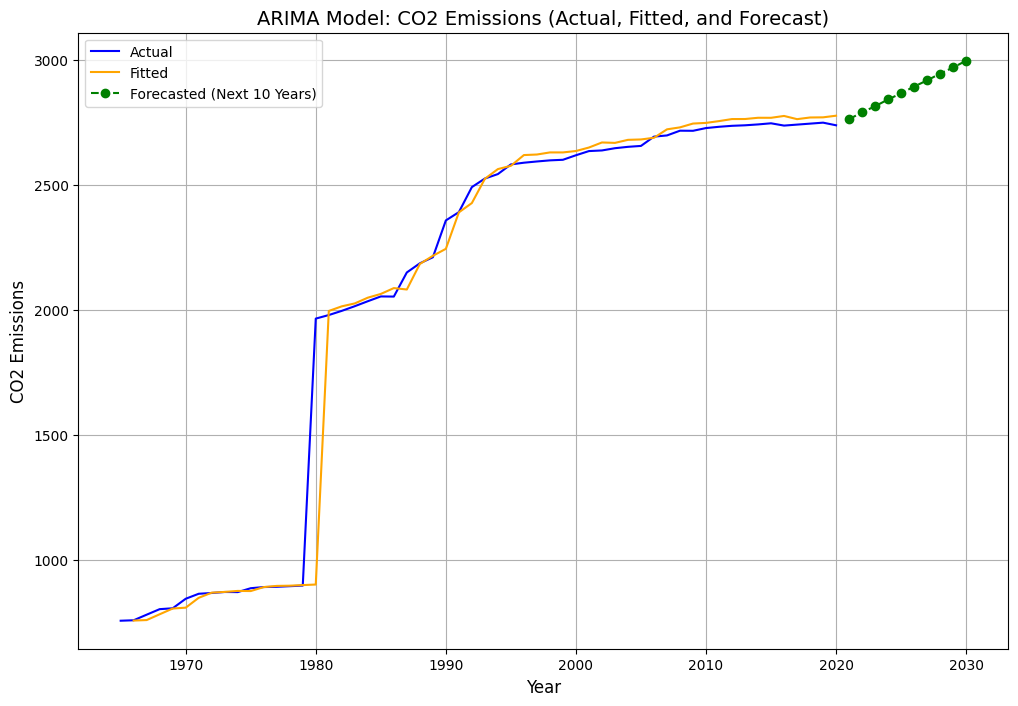

In [16]:
# Create a new DataFrame to hold forecasted values
future_years = pd.date_range(start=time_series_data['Year'].iloc[-1] + pd.offsets.YearEnd(1), periods=10, freq='Y')
forecast_df = pd.DataFrame({
    'Year': future_years,
    'CO2_Emissions': forecast
})

# Plot actual, fitted, and forecasted values
plt.figure(figsize=(12, 8))

# Plot actual values
plt.plot(time_series_data['Year'], time_series_data['CO2_Emissions'], label='Actual', color='blue')

# Plot fitted values
plt.plot(time_series_data['Year'][1:], fitted_values[1:], label='Fitted', color='orange')

# Plot forecasted values
plt.plot(future_years, forecast, label='Forecasted (Next 10 Years)', color='green', linestyle='--', marker='o')

# Add labels, title, and legend
plt.title('ARIMA Model: CO2 Emissions (Actual, Fitted, and Forecast)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Emissions', fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig(f"../../img/ARIMA_Prediction.png")

# Show the plot
plt.show()


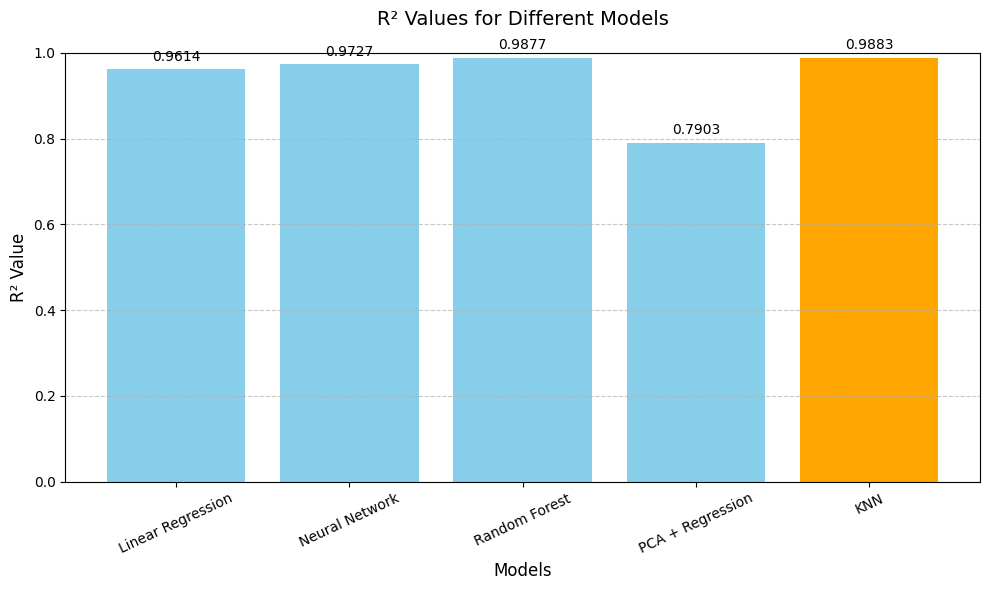

In [17]:
import matplotlib.pyplot as plt

# R² values for the models
models = ['Linear Regression', 'Neural Network', 'Random Forest', 'PCA + Regression', 'KNN']
r2_values = [r2_LR, r2_NN, r2_rf, r2_PCA, r2_KNN]  # Replace these with your variable names or values

# Determine the index of the highest R² value
max_index = r2_values.index(max(r2_values))

# Assign colors, highlighting the highest bar
colors = ['skyblue' if i != max_index else 'orange' for i in range(len(r2_values))]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=colors)
plt.title('R² Values for Different Models', fontsize=14, pad=20)  # Add padding to the title
plt.xlabel('Models', fontsize=12)
plt.ylabel('R² Value', fontsize=12)
plt.ylim(0, 1)  # Ensure the y-axis is from 0 to 1
plt.xticks(rotation=25, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations for R² values with three decimal places
for i, value in enumerate(r2_values):
    plt.text(i, value + 0.02, f"{value:.4f}", ha='center', fontsize=10)

# Display the bar chart
plt.tight_layout()
plt.savefig(f"../../img/R2_result.png")
plt.show()
